<a href="https://colab.research.google.com/github/Dicti93/MLSEM/blob/master/3.%20Data%20Preparation%20/Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False) 
pd.set_option('display.width', 240)

In [2]:
# Create dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

X = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets

data = pd.merge(X, y, left_index=True, right_index=True)
data.shape

(782, 56)

In [3]:
# deleting not needed target variables from data
data = data.drop(['Management', 'Severity'], axis=1)
data.shape

(782, 54)

In [4]:
# removing all NAN values from diagnosis
data = data.dropna(subset=['Diagnosis'])
data.shape

(780, 54)

In [5]:
'''
# Plot missing values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()
'''

"\n# Plot missing values as a heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(data.isnull(), cbar=False, cmap='viridis')\nplt.title('Missing Values Visualization')\nplt.tight_layout()  # Adjust layout to fit everything neatly\nplt.show()\n"

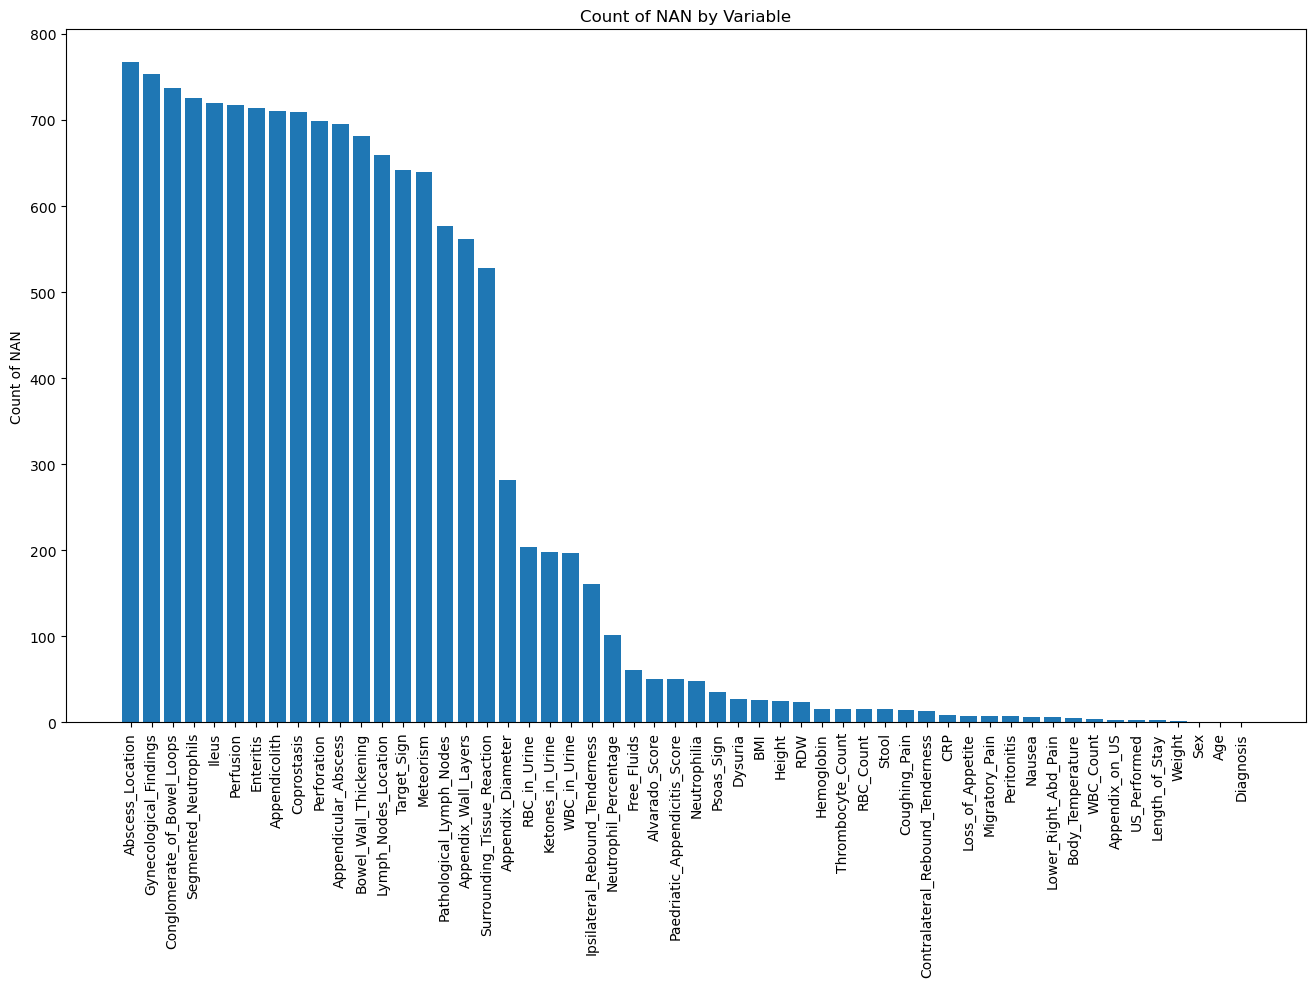

In [6]:
# visualizing count of NAN values
nan_counts = data.isna().sum()
nan_counts_sorted = nan_counts.sort_values(ascending=False)  # Sort values in descending order

plt.figure(figsize=(16, 9))
plt.bar(nan_counts_sorted.index, nan_counts_sorted.values)
plt.xticks(rotation=90)
plt.title('Count of NAN by Variable')
plt.ylabel('Count of NAN')
plt.show()

In [7]:
def convert_variables(df):
    # Demographic Variables
    df["Sex"] = df["Sex"].replace(['male', 'female', 'no'], [1, 0, np.nan])

    # Clinical Variables
    df["Peritonitis"] = df["Peritonitis"].replace({"no": 0, "local": 1, "generalized": 1})
    df["Migratory_Pain"] = df["Migratory_Pain"].replace({'yes': 1, 'no': 0})
    df["Lower_Right_Abd_Pain"].replace({'yes': 1, 'no': 0})
    df["Contralateral_Rebound_Tenderness"] = df["Contralateral_Rebound_Tenderness"].replace({'yes': 1, 'no': 0})
    df["Coughing_Pain"] = df["Coughing_Pain"].replace({'yes': 1, 'no': 0})
    df["Psoas_Sign"] = df["Psoas_Sign"].replace({'yes': 1, 'no': 0})
    df["Nausea"] = df["Nausea"].replace({'yes': 1, 'no': 0})
    df["Loss_of_Appetite"] = df["Loss_of_Appetite"].replace({'yes': 1, 'no': 0})
    df["Dysuria"] = df["Dysuria"].replace({'yes': 1, 'no': 0})
    df["Ipsilateral_Rebound_Tenderness"] = df["Ipsilateral_Rebound_Tenderness"].replace({'yes': 1, 'no': 0})
    df["Stool"] = df["Stool"].replace({'diarrhea': 1, 'normal': 0, 'constipation': 1, 'constipation, diarrhea': 1, 'no': 0})
    df["Lower_Right_Abd_Pain"] = df["Lower_Right_Abd_Pain"].replace({'yes': 1, 'no': 0})

    # Laboratory Variables
    df["Ketones_in_Urine"] = df["Ketones_in_Urine"].replace({'no': 0, '+': 1, '++': 1, '+++': 1})
    df["RBC_in_Urine"] = df["RBC_in_Urine"].replace({'no': 0, '+': 1, '++': 1, '+++': 1})
    df["WBC_in_Urine"] = df["WBC_in_Urine"].replace({'no': 0, '+': 1, '++': 1, '+++': 1})
    df["Neutrophilia"] = df["Neutrophilia"].replace({'yes': 1, 'no': 0})

    # Ultrasound Variables
    df["US_Performed"] = df["US_Performed"].replace({'yes': 1, 'no': 0})
    df["Appendix_on_US"] = df["Appendix_on_US"].replace({'yes': 1, 'no': 0})
    df["Free_Fluids"] = df["Free_Fluids"].replace({'yes': 1, 'no': 0})
    df["Appendix_Wall_Layers"] = df["Appendix_Wall_Layers"].replace({"intact": 0, "no": 0, "raised": 1, "partially raised": 1, "upset": 1})
    df['Target_Sign'] = df['Target_Sign'].replace({'yes': 1, 'no': 0})
    df["Perfusion"] = df["Perfusion"].replace({"no": 0, "present": 1, "hypoperfused": 0, "hyperperfused": 1})
    df["Perforation"] = df["Perforation"].replace({"no": 0, "suspected": 1, "not excluded": np.nan, "yes": 1})
    df["Surrounding_Tissue_Reaction"] = df["Surrounding_Tissue_Reaction"].replace({'yes': 1, 'no': 0})
    df["Pathological_Lymph_Nodes"] = df["Pathological_Lymph_Nodes"].replace({'yes': 1, 'no': 0})
    df["Bowel_Wall_Thickening"] = df["Bowel_Wall_Thickening"].replace({'yes': 1, 'no': 0})
    df["Ileus"] = df["Ileus"].replace({'yes': 1, 'no': 0})
    df["Coprostasis"] = df["Coprostasis"].replace({'yes': 1, 'no': 0})
    df["Meteorism"] = df["Meteorism"].replace({'yes': 1, 'no': 0})
    df["Enteritis"] = df["Enteritis"].replace({'yes': 1, 'no': 0})
    df["Appendicular_Abscess"] = df["Appendicular_Abscess"].replace({"no": 0, "suspected": 1, "yes": 1})
    df["Conglomerate_of_Bowel_Loops"] = df["Conglomerate_of_Bowel_Loops"].replace({'yes': 1, 'no': 0})
    df["Appendicolith"] = df["Appendicolith"].replace({"no": 0, "suspected": 1, "yes": 1})
    df["Gynecological_Findings"] = df["Gynecological_Findings"].replace({'Ovarialzyste': 1,
                                                                        'Zyste Uterus': 1,
                                                                        'In beiden Ovarien Zysten darstellbar, links Ovar mit regelrechter Perfusion, rechts etwas vergrößert, keine eindeutige Perfusion nachweisbar. Retrovesikal freie Flüssigkeit mit Binnenecho': 1,
                                                                        'Ausschluss pathologischer Ovarialbefund': 1,
                                                                        'kleine Ovarzyste rechts': 1,
                                                                        'kein Anhalt für eine gynäkologische Ursache der Beschwerden': 0,
                                                                        'V. a. Ovarialtorsion': 1,
                                                                        'Ausschluss gyn. Ursache der Beschwerden': 0,
                                                                        'ja': 1,
                                                                        'keine': 0,
                                                                        'Ovarialzysten': 1,
                                                                        'Ovarialzyste re.': 1,
                                                                        'unauffällig': 0,
                                                                        'Ovarialzyste ': 1})

    # Diagnosis
    df["Diagnosis"] = df["Diagnosis"].replace({'appendicitis': 1, 'no appendicitis': 0})

    # Dropping Columns
    df.drop("Lymph_Nodes_Location", axis=1, inplace=True)
    df.drop("Abscess_Location", axis=1, inplace=True)

    return df

In [8]:
# For all ultrasound variables, NAN are replaced by 0
def impute_US(df):
    df['Appendix_Wall_Layers'] = df['Appendix_Wall_Layers'].replace({np.nan: 0})
    df['Target_Sign'] = df['Target_Sign'].replace({np.nan: 0})
    df['Perforation'] = df['Perforation'].replace({np.nan: 0})
    df['Appendicular_Abscess'] = df['Appendicular_Abscess'].replace({np.nan: 0})
    df['Conglomerate_of_Bowel_Loops'] = df['Conglomerate_of_Bowel_Loops'].replace({np.nan: 0})
    df['Enteritis'] = df['Enteritis'].replace({np.nan: 0})
    df['Appendix_on_US'] = df['Appendix_on_US'].replace({np.nan: 0})
    df['Pathological_Lymph_Nodes'] = df['Pathological_Lymph_Nodes'].replace({np.nan: 0})
    df['Ileus'] = df['Ileus'].replace({np.nan: 0})
    df['Coprostasis'] = df['Coprostasis'].replace({np.nan: 0})
    df['Meteorism'] = df['Meteorism'].replace({np.nan: 0})
    df['Gynecological_Findings'] = df['Gynecological_Findings'].replace({np.nan: 0})
    df['Surrounding_Tissue_Reaction'] = df['Surrounding_Tissue_Reaction'].replace({np.nan: 0})
    df['Free_Fluids'] = df['Free_Fluids'].replace({np.nan: 0})
    df['Bowel_Wall_Thickening'] = df['Bowel_Wall_Thickening'].replace({np.nan: 0})

    return df

In [9]:
data = convert_variables(data)
data = impute_US(data)
data.shape

(780, 52)

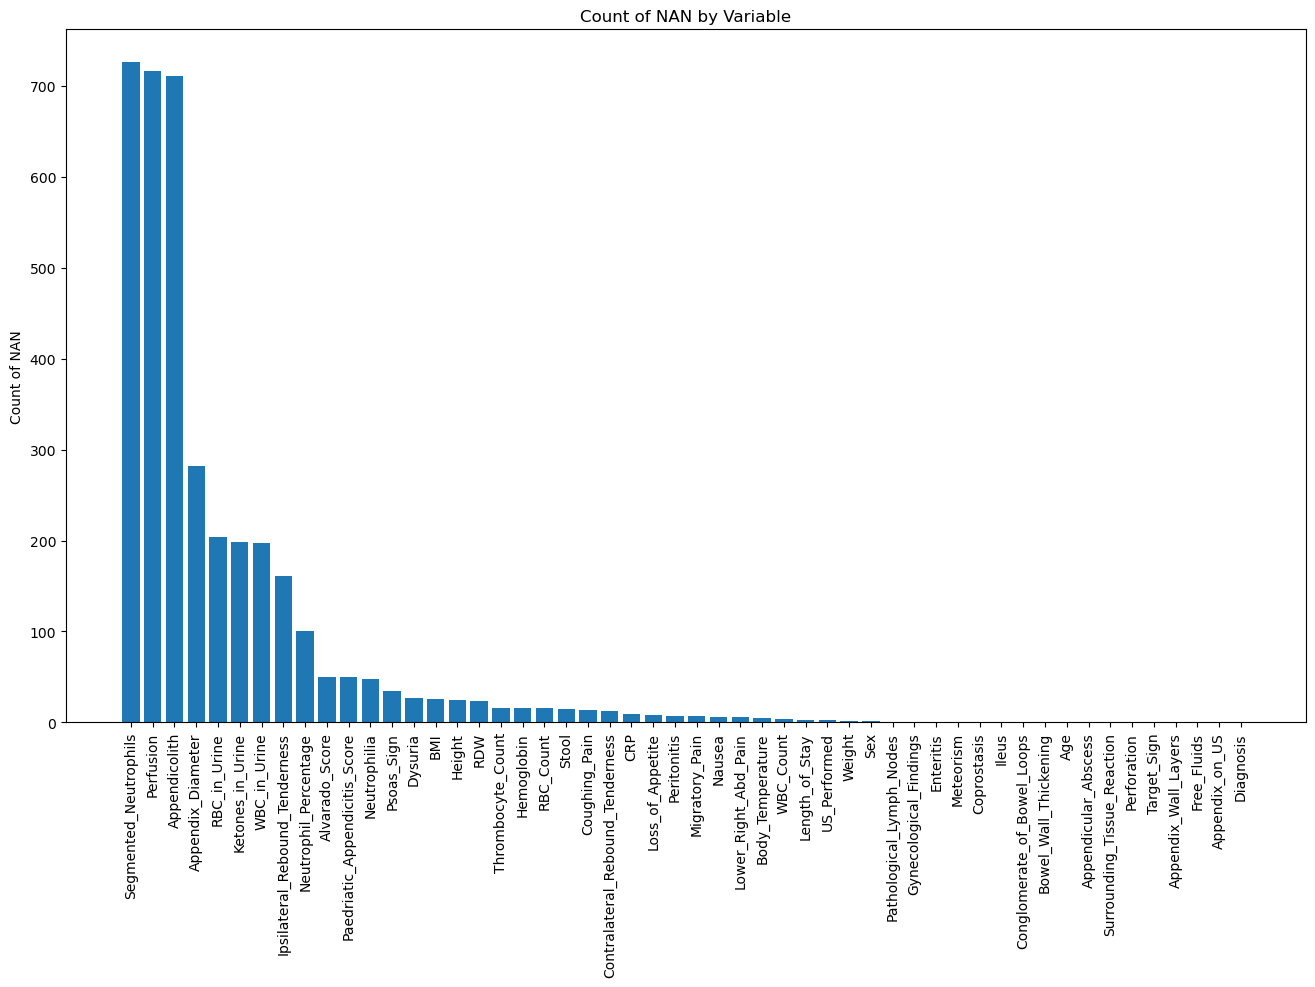

In [10]:
# visualizing count of NAN values
nan_counts = data.isna().sum()
nan_counts_sorted = nan_counts.sort_values(ascending=False)  # Sort values in descending order

plt.figure(figsize=(16, 9))
plt.bar(nan_counts_sorted.index, nan_counts_sorted.values)
plt.xticks(rotation=90)
plt.title('Count of NAN by Variable')
plt.ylabel('Count of NAN')
plt.show()

In [14]:
# Check for empty values in BMI, Height, and Weight columns
missing_bmi = data['BMI'].isnull()
missing_height = data['Height'].isnull()
missing_weight = data['Weight'].isnull()

# Calculate BMI where it is empty
height_in_meters_squared = (data['Height'] / 100) ** 2
calculated_bmi = data['Weight'] / height_in_meters_squared * 10000

# Replace empty BMI values with calculated BMI
data.loc[missing_bmi, 'BMI'] = calculated_bmi[missing_bmi]

# Drop rows where BMI is still empty and either Height or Weight is empty
rows_to_drop_bmi = data[missing_bmi & (missing_height | missing_weight)].index
data.drop(rows_to_drop_bmi, inplace=True)

# Check for empty values in Sex
missing_sex = data['Sex'].isnull()

# Drop rows where Sex is empty
rows_to_drop_sex = data[missing_sex].index
data.drop(rows_to_drop_sex, inplace=True)

In [15]:
data.shape

(754, 54)

In [16]:
data = convert_variables(data)
data = impute_US(data)
data.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,Neutrophilia,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,Ketones_in_Urine,RBC_in_Urine,WBC_in_Urine,CRP,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,Free_Fluids,Appendix_Wall_Layers,Target_Sign,Appendicolith,Perfusion,Perforation,Surrounding_Tissue_Reaction,Appendicular_Abscess,Pathological_Lymph_Nodes,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings,Diagnosis
0,12.68,16.9,0,148.0,37.0,3.0,4.0,3.0,1.0,7.1,0.0,1.0,1.0,0.0,0.0,1.0,37.0,7.7,68.2,NaN,0.0,5.27,14.8,12.2,254.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,14.10,31.9,1,147.0,69.5,2.0,5.0,4.0,0.0,NaN,1.0,1.0,1.0,0.0,0.0,1.0,36.9,8.1,64.8,NaN,0.0,5.26,15.7,12.7,151.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,14.14,23.3,0,163.0,62.0,4.0,5.0,3.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,36.6,13.2,74.8,NaN,0.0,3.98,11.4,12.2,300.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,16.37,20.6,0,165.0,56.0,3.0,7.0,6.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,36.0,11.4,63.0,NaN,0.0,4.64,13.6,13.2,258.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,11.08,16.9,0,163.0,45.0,3.0,5.0,6.0,1.0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,36.9,8.1,44.0,NaN,0.0,4.44,12.6,13.6,311.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


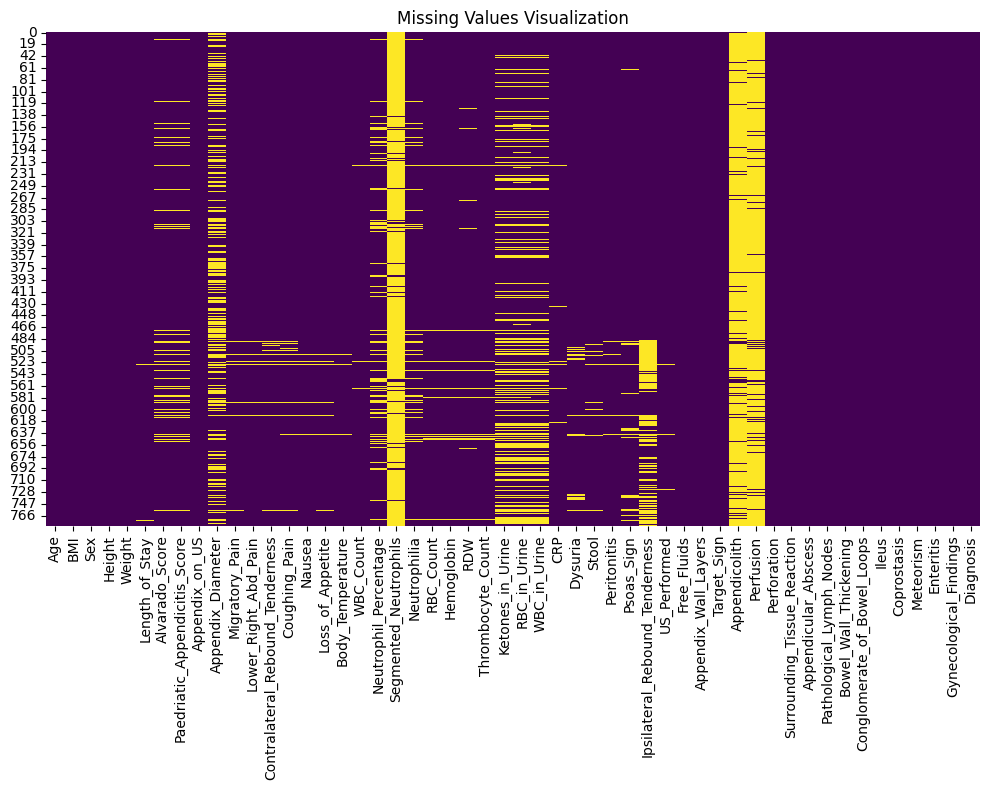

In [28]:
# Plot missing values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

In [32]:
from sklearn.impute import KNNImputer
imputation_knn = KNNImputer(n_neighbors=1)
new_data = imputation_knn.fit_transform(data)
new_data = pd.DataFrame(new_data, columns=data.columns)
new_data

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,Neutrophilia,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,Ketones_in_Urine,RBC_in_Urine,WBC_in_Urine,CRP,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,Free_Fluids,Appendix_Wall_Layers,Target_Sign,Appendicolith,Perfusion,Perforation,Surrounding_Tissue_Reaction,Appendicular_Abscess,Pathological_Lymph_Nodes,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings,Diagnosis
0,12.68,16.90,0.0,148.0,37.0,3.0,4.0,3.0,1.0,7.1,0.0,1.0,1.0,0.0,0.0,1.0,37.0,7.7,68.2,46.0,0.0,5.27,14.8,12.2,254.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,14.10,31.90,1.0,147.0,69.5,2.0,5.0,4.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,36.9,8.1,64.8,39.0,0.0,5.26,15.7,12.7,151.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,14.14,23.30,0.0,163.0,62.0,4.0,5.0,3.0,0.0,5.1,0.0,1.0,1.0,0.0,0.0,0.0,36.6,13.2,74.8,41.0,0.0,3.98,11.4,12.2,300.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,16.37,20.60,0.0,165.0,56.0,3.0,7.0,6.0,0.0,6.8,1.0,1.0,0.0,0.0,1.0,1.0,36.0,11.4,63.0,41.0,0.0,4.64,13.6,13.2,258.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,11.08,16.90,0.0,163.0,45.0,3.0,5.0,6.0,1.0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,36.9,8.1,44.0,33.0,0.0,4.44,12.6,13.6,311.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,12.41,25.25,0.0,166.5,70.0,4.0,8.0,7.0,1.0,7.5,1.0,1.0,0.0,0.0,0.0,1.0,39.4,11.4,76.6,63.0,1.0,4.95,13.7,13.4,243.0,0.0,0.0,0.0,71.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
750,17.09,20.43,0.0,158.0,51.0,6.0,5.0,3.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,37.8,17.4,89.2,78.0,1.0,4.52,13.1,12.8,310.0,1.0,1.0,1.0,245.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
751,14.99,19.91,0.0,152.0,46.0,4.0,5.0,3.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,37.3,14.6,68.5,46.0,0.0,4.49,12.7,12.8,328.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
752,7.20,14.30,1.0,129.3,23.9,5.0,9.0,8.0,1.0,14.0,1.0,1.0,0.0,1.0,1.0,0.0,37.5,17.8,77.0,38.0,1.0,4.97,14.3,12.7,345.0,1.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               754 non-null    float64
 1   BMI                               754 non-null    float64
 2   Sex                               754 non-null    float64
 3   Height                            754 non-null    float64
 4   Weight                            754 non-null    float64
 5   Length_of_Stay                    754 non-null    float64
 6   Alvarado_Score                    754 non-null    float64
 7   Paedriatic_Appendicitis_Score     754 non-null    float64
 8   Appendix_on_US                    754 non-null    float64
 9   Appendix_Diameter                 754 non-null    float64
 10  Migratory_Pain                    754 non-null    float64
 11  Lower_Right_Abd_Pain              754 non-null    float64
 12  Contrala

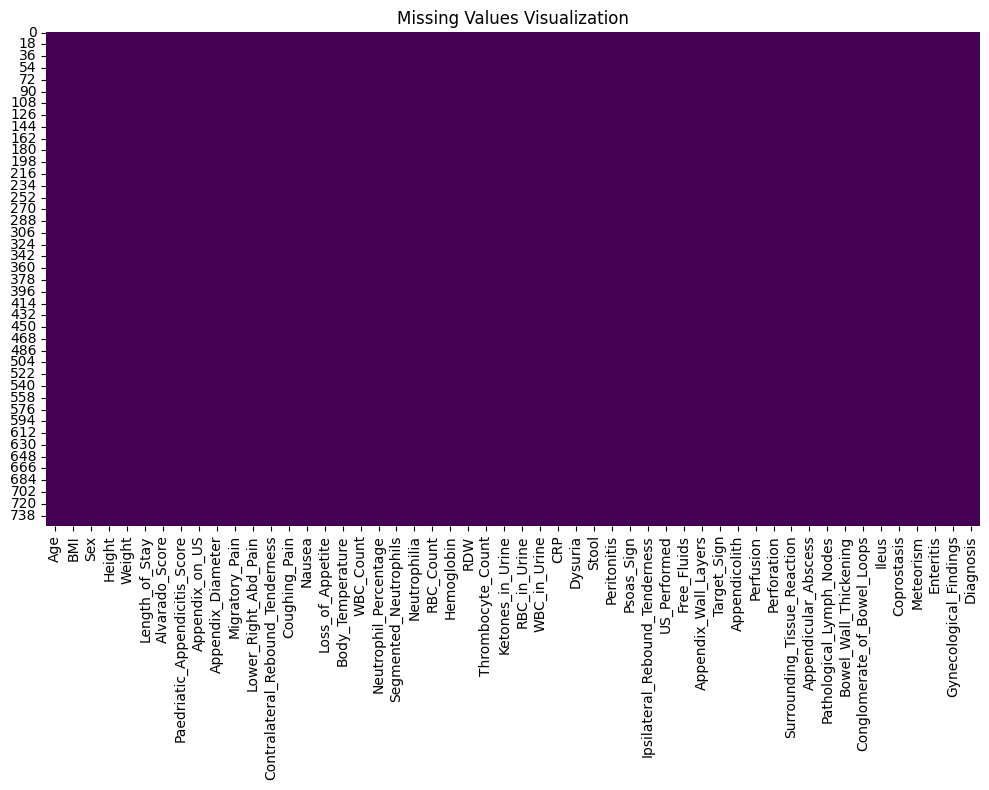

In [34]:
# Plot missing values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(new_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

In [35]:
new_data.to_csv('clean_data.csv', index=False)

# Colab file management to download the file to your local system
from google.colab import files
files.download('clean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>